In [1]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import json
import os
from collections import Counter
import datetime as dt


# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
# from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle

In [2]:
df=pd.read_csv(r"dataset/2020-03-29 Coronavirus Tweets.CSV")

In [3]:
df_in=df.loc[df['country_code']=='IN']
df_in = df_in.loc[df['lang']=='en']['text']

In [4]:
df_in_lr = df_in.apply(lambda x: re.sub(r"https\S+", "", str(x)))

In [5]:
df_in_lr_lc = df_in_lr.apply(lambda x: x.lower())

In [61]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19', 'corona', '#coronaupdate', 'covid2019', 'covid19outbreak', 'covid', 'covıd19', 'covidー19', 'china', 'chinesevirus'])


In [7]:
#df_in_lr_lc_pr = df_in_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [10]:
df_in_lr_lc.head()


1625             "#covid19: #socialdistancing indian way"
1873    possible case human animal transmission way ar...
2658    #coronavirus: #us eclipses 120,000 confirmed c...
3273       bitter truth 😔 #covid19india #lockdown @ india
4629    churches shd realize "mass" forms worship r im...
Name: text, dtype: object

In [76]:
hashtags=[]
for tweet in df_in_lr_lc:
    hashtag=[i  for i in tweet.split() if i.startswith("#")]
    hashtags.extend(hashtag)



In [63]:
#df_in_lr_lc_sr = df_in_lr_lc.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [77]:
hashtags = [tag for tag in hashtags if tag not in stop_words]
#hashtags = [tag.replace('#','') for tag in hashtags]
hashtags = [tag.replace(':','') for tag in hashtags]
hashtags = [tag.replace('.','') for tag in hashtags]

In [78]:
hashtags
#len(hashtags)

['#socialdistancing',
 '#coronavirus',
 '#us',
 '#covid19india',
 '#lockdown',
 '#italy',
 '#usa',
 '#worldwide',
 '#deathcount',
 '#followmeplz',
 '#news',
 '#saveindia',
 '#covid19india',
 '#indiavscorona',
 '#indiafightcorona',
 '#indiafightscovid19',
 '#indiafightscorona',
 '#modi',
 '#delhi',
 '#stayawarestaysafe',
 '#stayhome',
 '#stayhomestaysafe',
 '#savelives',
 '#coronapandemic',
 '#stayhomesavelives',
 '#coronalockdown',
 '#suratreadytofight',
 '#surat',
 '#covid2019india',
 '#coronalockdown',
 '#indiafightscornona',
 '#sundaymorning',
 '#sundaythoughts',
 '#sundaymotivation',
 '#stayathomeandstaysafe',
 '#stayathomesavelives',
 '#sundayfunday',
 '#covid19',
 '#drones',
 '#feedtheneedy',
 '#feedingthenation',
 '#coronavirusindia',
 '#coronalockdown',
 '#coronawarrior',
 '#coronaviruspandemic',
 '#coronalockdown',
 '#coronalockdown',
 '#coronaviruspandemic',
 '#labourleftdelhi',
 '#god',
 '#justasking',
 '#coronalockdown',
 '#coronaalert',
 '#janathacurfew',
 '#indiafightscor

In [79]:
sns.set(style="darkgrid")
counts = Counter(hashtags).most_common(50)

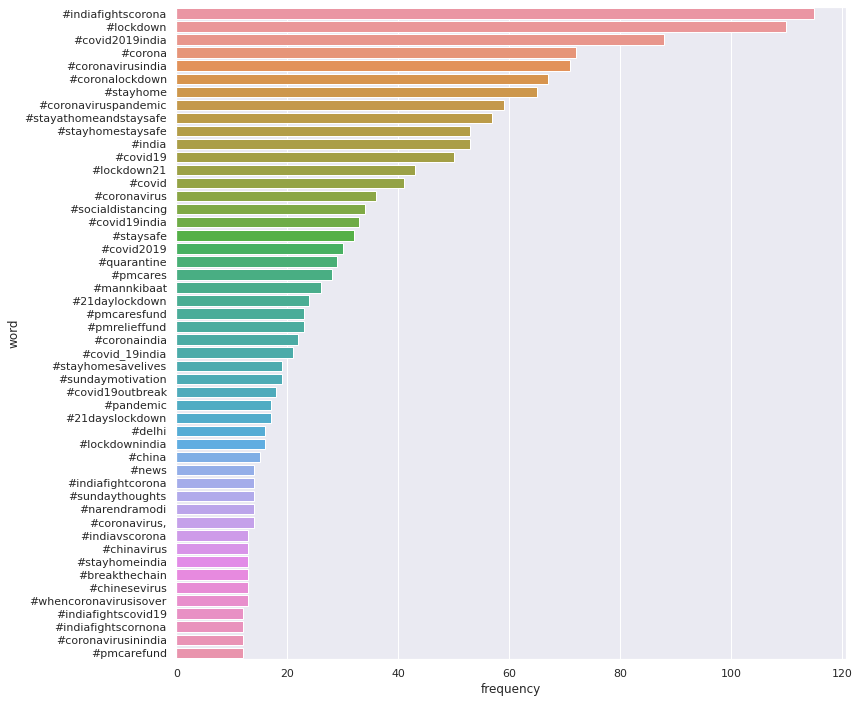

In [80]:
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('commonTweetsInIndia.png')